<a href="https://colab.research.google.com/github/PengjunHou/CSE437-RL/blob/main/lab2_mdp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: Markov Decision Problems

# Exercise 1: Grid World
Compute the value funnction for the example 4.1 in the book.







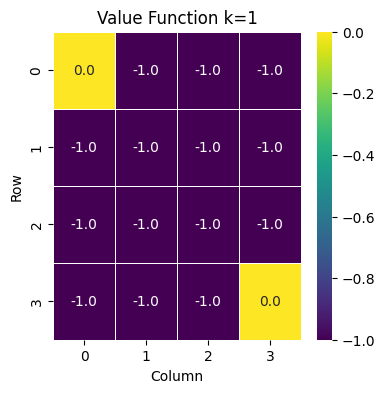

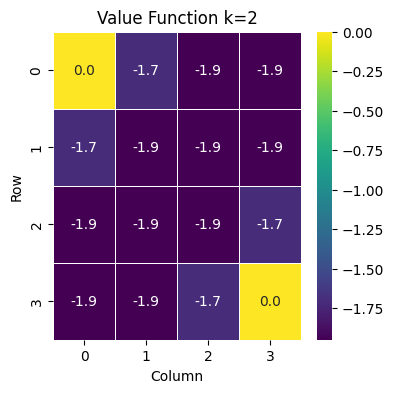

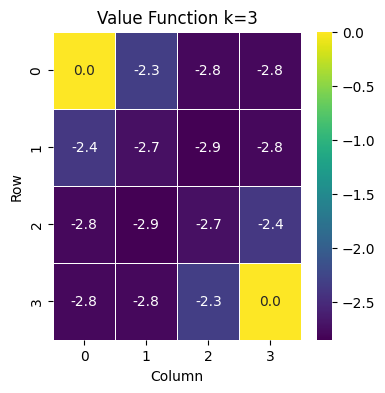

In [18]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

action2ind = {'←': -1, '→': 1, '↑': -4, '↓':4}

V = np.zeros(16)
gamma = 0.95  # Discount factor
V_old = np.zeros(16)


for k in range(3):
  for s in range(16):

    if s==0 or s==15:
      continue
    #### Write your code here #########
    tmp_V = 0
    for a in ['←', '→', '↑', '↓']:
      next_s = s + action2ind[a]
      r = -1
      if next_s >= 0 and next_s <= 15:
        tmp_V += 0.25 * (r + gamma * V_old[next_s])
      else:
        tmp_V += 0.25 * (r + gamma * V_old[s])
    V[s] = tmp_V


  V_old = V.copy()




  ###### PLOT
  # Reshape the 1D value function array into an 8x8 grid
  V_grid = V.reshape((4, 4))

  # Plot the value function as a heatmap
  plt.figure(figsize=(4, 4))
  sns.heatmap(V_grid, annot=True, cmap="viridis", fmt=".1f", linewidths=.5)
  plt.title("Value Function k=%d"%(k+1))
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.show()

# Exercise 2: Grid World
Compute the optimal policy




In [26]:
# print(V)
Policy_Grid = [''] * 16
for s in range(16):
  if s == 0 or s == 15:
    continue
  best_a = ''
  best_v = -np.inf
  for a in ['←', '→', '↑', '↓']:
    next_s = s + action2ind[a]
    if next_s >= 0 and next_s <= 15:
      if V[next_s] >= best_v:
        best_v = V[next_s]
        best_a = a
  for a in ['←', '→', '↑', '↓']:
    next_s = s + action2ind[a]
    if next_s >= 0 and next_s <= 15:
      if V[next_s] >= best_v:
        Policy_Grid[s] += a
  # Policy_Grid[s] = best_a

Policy = np.array(Policy_Grid).reshape((4,4))
print(Policy)
###### PLOT
# # Reshape the 1D value function array into an 8x8 grid
# optimal_grid = Policy_Grid.reshape((4, 4))

# # Plot the value function as a heatmap
# plt.figure(figsize=(4, 4))
# sns.heatmap(optimal_grid, annot=True, cmap="viridis", fmt=".1f", linewidths=.5)
# plt.title("Value Function k=%d"%(k+1))
# plt.xlabel("Column")
# plt.ylabel("Row")
# plt.show()

[['' '←' '←' '→']
 ['↑' '↑' '←' '↓']
 ['↑' '↑' '↓' '↓']
 ['←' '→' '→' '']]


# Exercise 3: Grid World
In the following gym environment, compute the value function using Monte Carlo.

Run the following code in your local machine. You can run in on colab, but you will not see the animation.

In [9]:
## Install https://github.com/damat-le/gym-simplegrid
!pip install gym_simplegrid

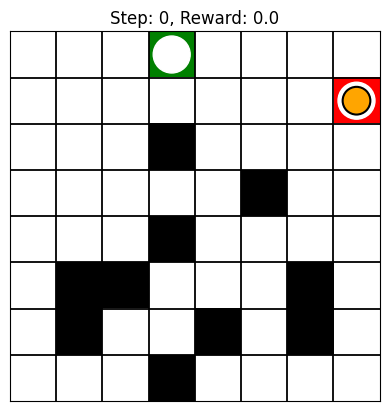

Location (1,6) t=0 reward=0.0
Location (0,6) t=1 reward=0.0
Location (0,6) t=2 reward=-1.0
Location (1,6) t=3 reward=0.0
Location (2,6) t=4 reward=0.0
Location (2,7) t=5 reward=0.0
Location (1,7) t=6 reward=0.0
Location (1,7) t=7 reward=-1.0
Location (2,7) t=8 reward=0.0
Location (2,6) t=9 reward=0.0


In [11]:

import gymnasium as gym
import gym_simplegrid

START_LOC = 15
GOAL_LOC = 3
# Define the initial location and the goal location in the grid.
# Each grid cell has an a number from 0 to 63.
options ={
    'start_loc': START_LOC,
    'goal_loc': GOAL_LOC
}

env = gym.make('SimpleGrid-8x8-v0', render_mode='human')
obs, info = env.reset(seed=1, options=options)
done = env.unwrapped.done

for t in range(10):
    if done:
        break
    action = env.action_space.sample()   # Random action
    obs, reward, done, _, info = env.step(action)

    grid_size = 8
    row = obs // grid_size
    col = obs % grid_size
    print("Location (", row, ",", col, ") t=",t, " reward=", reward, sep="")

# env.close()